<h1><center> PPOL564 | DS1 | Foundations<br><br><font color='grey'> 
Building a Naive Bayes Classifier </font> </center> <h1>

In [1]:
import pandas as pd
import numpy as np
import pprint as pp # for printing
import scipy.stats as st # for Normal PDF

# Plotting libraries 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Silence warnings 
import warnings
warnings.filterwarnings("ignore")

Download data used in this notebook from [Dropbox](https://www.dropbox.com/t/YfxmV1pSWMTPvzUa).

## Bayes Classifier

Let's use what we know of Bayes theorem to predict a binary outcome. If we think carefully, we were trying isolate the probability that $y = 1$ given the values of our predictor.


$$Pr(y=1 | X)$$

Put more generically, 

$$Pr(class | data) $$

That is, the predicted class is conditional on the predictors. 

We can use Bayes theorem here to construct a classifier that uses conditional probability to predict a class. 

<br><br>

$$Pr(class | data) = \frac{Pr(data | class) Pr(class)}{Pr(data)}$$

<br><br>

This calculation can be performed for more than one class. We just need to calculate probability for each class in the problem. We then look at all the probabilities for each class assignment, and choose the largest (i.e. maximize). 

However, such a classifier is **_difficult to compute_**.

> "The conditional probability of the observation based on the class $Pr(data|class)$ is not feasible unless the number of examples is extraordinarily large, e.g. large enough to effectively estimate the probability distribution for all different possible combinations of values. This is almost never the case, we will not have sufficient coverage of the domain." ([Brownlee](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/))

As both the data grows (in either the number of parameters or the size of the data), the estimation task becomes more difficult. 

## Naive Bayes Classifier

We can greatly simplify the above equation by making a simple assumption: <u>**that each variable is _independent_ of the other variables in the model**.</u>

<br><br><br>

$$Pr(class | data) = \frac{Pr( x_1| class)\times Pr( x_2| class) \times \dots \times  Pr(class)}{Pr(data)}$$

<br><br><br>

where $x_1$ and $x_2$ represent variables in the data. 

<br><br>

We can further simplify by dropping the denominator. As the $Pr(data)$ is a normalizing constant it can be removed.

<br><br><br>

$$Pr(class | data) = Pr( x_1| class)\times Pr( x_2| class) \times \dots \times  Pr(class)$$

<br><br><br>

This is known as a **Naive Bayesian Classifier**, or Naive Bayes. The "naivety" stems from the simplifying assumptions we make to the original Bayesian setup. 

<br><br><br>

## Building a Naive Bayesian Classifier

Let's build a Naive Bayes classifier on a binary outcome ( $y \in [0,1]$ ) with binary predictor variables. Below is a dataset that tracks when a country enters into a civil war given their level of economic development and political regime type:
- `develop = 1` means a "developed economy", 
- `develop = 0` means a "developing economy")
- `authoritarian = 1` means an "authoritarian regime", 
- `authoritarian = 0` means a "quasi/full-democracy".

In [2]:
# Set seed
np.random.seed(1234)

# readd in data
cw_data = pd.read_csv("data/civil_war.csv")

# Train-Test split (just using Pandas)
train = cw_data.sample(frac=.8).reset_index(drop=True)
test = cw_data.drop(train.index).reset_index(drop=True)

# Print off the split count 
print("Training Data:",train.shape[0],
      "\nTest Data:",test.shape[0])

# Look at the head of the data
train.head()

Training Data: 80 
Test Data: 20


,civil_war,developed,authoritarian
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,1
4,1,0,1


### Calculate Class Probabilities: $Pr(class)$

In [3]:
N = train.shape[0]

# Subset the data by class
cw1 = train.query("civil_war == 1")
cw0 = train.query("civil_war == 0")

# Calculate the probability for each class
pr_cw_1 = cw1.shape[0]/N
pr_cw_0 = cw0.shape[0]/N

# Print the probabilities
print(
f"""
Pr(civil_war = 1): {pr_cw_1}
Pr(civil_war = 0): {pr_cw_0}
""")


Pr(civil_war = 1): 0.3125
Pr(civil_war = 0): 0.6875



### Calculate the Conditional Probabilities $Pr(data | class)$

- $Pr(developed = 1 | CW = 1)$
- $Pr(developed = 0 | CW = 1)$
- $Pr(developed = 1 | CW = 0)$
- $Pr(developed = 0 | CW = 0)$
- $Pr(authoritarian = 1 | CW = 1)$
- $Pr(authoritarian = 0 | CW = 1)$
- $Pr(authoritarian = 1 | CW = 0)$
- $Pr(authoritarian = 0 | CW = 0)$

In [4]:
# Given CW == 1
d1_cw1 = cw1.query("developed == 1").shape[0]/cw1.shape[0]
d0_cw1 = cw1.query("developed == 0").shape[0]/cw1.shape[0]
a1_cw1 = cw1.query("authoritarian == 1").shape[0]/cw1.shape[0]
a0_cw1 = cw1.query("authoritarian == 0").shape[0]/cw1.shape[0]

# Given CW == 0
d1_cw0 = cw0.query("developed == 1").shape[0]/cw0.shape[0]
d0_cw0 = cw0.query("developed == 0").shape[0]/cw0.shape[0]
a1_cw0 = cw0.query("authoritarian == 1").shape[0]/cw0.shape[0]
a0_cw0 = cw0.query("authoritarian == 0").shape[0]/cw0.shape[0]

print(
f"""
Pr(developed = 1 |civil_war = 1): {d1_cw1}
Pr(developed = 0 |civil_war = 1): {d0_cw1}
Pr(developed = 1 |civil_war = 0): {d1_cw0}
Pr(developed = 0 |civil_war = 0): {d0_cw0}
Pr(authoritarian = 1 |civil_war = 1): {a1_cw1}
Pr(authoritarian = 0 |civil_war = 1): {a0_cw1}
Pr(authoritarian = 1 |civil_war = 0): {a1_cw0}
Pr(authoritarian = 0 |civil_war = 0): {a0_cw0}
""")


Pr(developed = 1 |civil_war = 1): 0.4
Pr(developed = 0 |civil_war = 1): 0.6
Pr(developed = 1 |civil_war = 0): 0.6909090909090909
Pr(developed = 0 |civil_war = 0): 0.3090909090909091
Pr(authoritarian = 1 |civil_war = 1): 0.92
Pr(authoritarian = 0 |civil_war = 1): 0.08
Pr(authoritarian = 1 |civil_war = 0): 0.41818181818181815
Pr(authoritarian = 0 |civil_war = 0): 0.5818181818181818



### Make a Prediction

Now we simply multiply together the probabilities for each outcome given some configuration of the variables. 

For example, say we want to predict whether **a country will enter into a civil war given its a _developing democracy_**. 

In [5]:
prob_cw1 = d0_cw1 * a0_cw1 * pr_cw_1
prob_cw0 = d0_cw0 * a0_cw0 * pr_cw_0

print(f"""
Pr(cw = 1) = {prob_cw1}
Pr(cw = 0) = {prob_cw0}
""")


Pr(cw = 1) = 0.015
Pr(cw = 0) = 0.12363636363636363



$.124$ is greater than $.015$ so we predict "no civil war" ($CW = 0$). 

Now, let's use the probabilities to predict if an authoritarian developing country will enter into a civil war. 

In [6]:
prob_cw1 = d0_cw1 * a1_cw1 * pr_cw_1
prob_cw0 = d0_cw0 * a1_cw0 * pr_cw_0

print(f"""
Pr(cw = 1) = {prob_cw1}
Pr(cw = 0) = {prob_cw0}
""")


Pr(cw = 1) = 0.17250000000000001
Pr(cw = 0) = 0.08886363636363635



$.173$ is greater than $.089$ so we'll predict "civil war" for this observation ($CW = 1$). 

In essence, we do this for every observation in the data. The idea is that we leverage conditional probabilities in the data to predict future class assignment, assuming the data generating process in the training data (i.e. the data we're learning on) is equivalent to the data we test on. 

### Predicting Multiple Observations

Let's now expand this setup so that we can calculate the underlying probabilities and then calculate the predictions for each observation in the data. 

In [7]:
def calc_probs(data,outcome_var=""):
    '''
    Function calculates the class and conditional probabilities in 
    the binary data. 
    
    Note that I'm using dictionaries with tuple keys to keep
    track of the variable, it's val, and the outcome, which we're conditioning on. 
    '''
    # Generate empty dictionary containers.
    class_probs = {};cond_probs = {}
    # Locate all variables that are not the outcome.
    vars = [v for v in data.columns if v != outcome_var]
    # iterate through the class outcomes
    for y, d in data.groupby(outcome_var): 
        # calculate the class probabilities
        class_probs.update({y: d.shape[0]/data.shape[0]})
        for v in vars:
            # calculate the conditional probabilities for each variable given the class.
            pr = d[v].sum()/d.shape[0]
            cond_probs[(v,1,y)] = pr 
            cond_probs[(v,0,y)] = 1 - pr
    return class_probs, cond_probs


# Run
class_probs, cond_probs = calc_probs(train,outcome_var="civil_war")

# Print
print("class probabilities",end="\n\n")
pp.pprint(class_probs)
print("\n")
print("conditional probabilities",end="\n\n")
pp.pprint(cond_probs)

class probabilities

{0: 0.6875, 1: 0.3125}


conditional probabilities

{('authoritarian', 0, 0): 0.5818181818181818,
 ('authoritarian', 0, 1): 0.07999999999999996,
 ('authoritarian', 1, 0): 0.41818181818181815,
 ('authoritarian', 1, 1): 0.92,
 ('developed', 0, 0): 0.3090909090909091,
 ('developed', 0, 1): 0.6,
 ('developed', 1, 0): 0.6909090909090909,
 ('developed', 1, 1): 0.4}


Now we've conveniently stored all the probabilities as dictionaries. Let's build a prediction function that combs through the observations in the data and calculates the probabilities and makes a class prediction. 

In [8]:
def predict(data,class_probs,cond_probs):
    '''
    Function calculates the conditiona probability for membership into each class.
    Then returns both the probabilities and the most likely class. 
    '''
    store_preds = []
    for i,row in data.iterrows():
        pr_1 = 1; pr_0 = 1
        for j in range(1,len(row.index)):
            pr_0 *= cond_probs[(row.index[j],row.values[j],0)]
            pr_1 *= cond_probs[(row.index[j],row.values[j],1)]     
        pr_0 *= class_probs[0]
        pr_1 *= class_probs[1]
        store_preds.append([pr_0,pr_1,max([(pr_0,0),(pr_1,1)])[1]])
    return pd.DataFrame(store_preds,columns=["pr_0","pr_1","pred"])

# Run 
preds = predict(train, class_probs, cond_probs)
preds.head()

,pr_0,pr_1,pred
0,0.123636,0.0150,0
1,0.276364,0.0100,0
2,0.276364,0.0100,0
3,0.198636,0.1150,0
4,0.088864,0.1725,1


Finally, let's calculate predictive accuracy (i.e. how many correct prediction did we make).

In [9]:
accuracy = sum(train.civil_war == preds.pred)/train.shape[0]
accuracy

0.7625

We obtained predictive accuracy of 76.3% on the training data, not bad!

Let's now try to predict the outcomes in the test data and see how we do.

In [10]:
test_preds = predict(test, class_probs, cond_probs)
test_accuracy = sum(test.civil_war == test_preds.pred)/test.shape[0]
test_accuracy

0.9

We have an out of sample prediction of 90%.

Though the **Naive Bayes Classifier**  is quite simplistic when compared to other modeling strategies (such as a neural net or a gradient boosting machine); however, it proves to be effective on a wide array of prediction tasks. 

## Naive Bayesian Classifier with Continuous Predictors

The modeling strategy outlined above assumes that we have binary or discrete predictors (i.e. 0/1). However, what if that's not the case, and we have continuous features that we want to use in the prediction task? 

For this exercise, let's use the same data as we did in the gradient descent lecture.

In [11]:
train = pd.read_csv("data/training_data.csv")
test = pd.read_csv("data/test_data.csv")
train.head()

,y,x1,x2
0,1.0,-1.085631,-0.748827
1,1.0,0.997345,0.567595
2,1.0,0.282978,0.718151
3,0.0,-1.506295,-0.999381
4,1.0,-0.578600,0.474898


As we did when in the gradient descent lecture, we need a way to map a continuous variable into a probability space. Here we'll use the probability density function for Gaussian (normal) distribution to convert continuous values into probabilities.

Note that we can use information regarding the distribution of each continuous predict and find out where any single point is on that continuous variables probability distribution.

In [12]:
st.norm(0, 1).pdf(-1.69) # using the scipy.stats module

0.09565679616352402

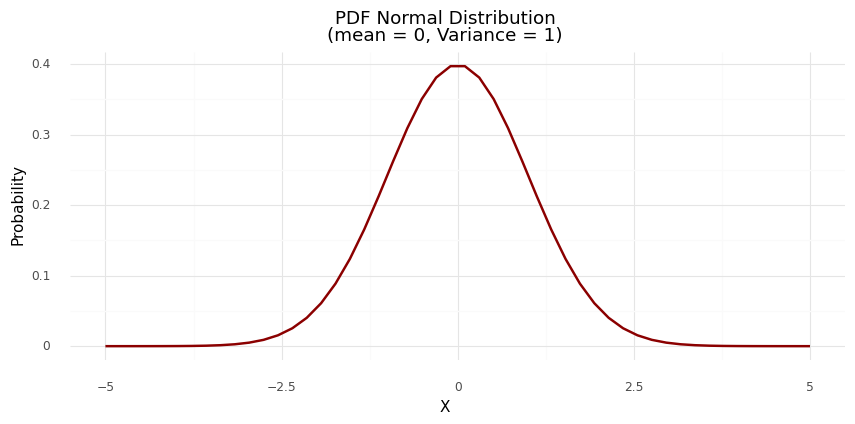

<ggplot: (8794365247422)>

In [13]:
# Calculate the CDF for values in-between the interval of -5 and 5
d = pd.DataFrame([[i,st.norm(0, 1).pdf(i)] for i in np.linspace(-5,5)],
                columns= ["x","y"])

# Plot (with plotnine/ggplot2)
(
    ggplot(d,aes("x","y")) +
    geom_line(color="darkred",size=1) +
    labs(title="PDF Normal Distribution\n(mean = 0, Variance = 1)",
         x = "X",y = "Probability") +
    theme_minimal() +
    theme(figure_size=(10,4))
)

We can calculate the conditional mean and standard deviation for each value of the outcome and then calculate the predictions from there for any one of our continuous variables.

Let's go through the steps again.

### Calculate Class Probabilities: $Pr(class)$

In [14]:
y1 = train.query("y == 1")
y0 = train.query("y == 0")

# Class probabilities.
pr_y1 = y1.shape[0]/train.shape[0]
pr_y0 = y0.shape[0]/train.shape[0]

### Calculate the conditional means/standard deviations

In [15]:
# Collect the mean and standard dev. of each conditional distribution
dist_locs = \
{("x1",1):{'mean':y1.x1.mean(),'sd':y1.x1.std()},
 ("x1",0):{'mean':y0.x1.mean(),'sd':y0.x1.std()},
 ("x2",1):{'mean':y1.x2.mean(),'sd':y1.x2.std()},
 ("x2",0):{'mean':y0.x2.mean(),'sd':y0.x2.std()}
}

# Print
pp.pprint(dist_locs)

{('x1', 0): {'mean': 0.5156773594310682, 'sd': 0.9113594482519166},
 ('x1', 1): {'mean': -0.36705951737634046, 'sd': 0.903305618794902},
 ('x2', 0): {'mean': -0.7234270807398658, 'sd': 0.7924025069188566},
 ('x2', 1): {'mean': 0.4400327732120252, 'sd': 0.7671342801807611}}


View what these different conditional distributions look like:

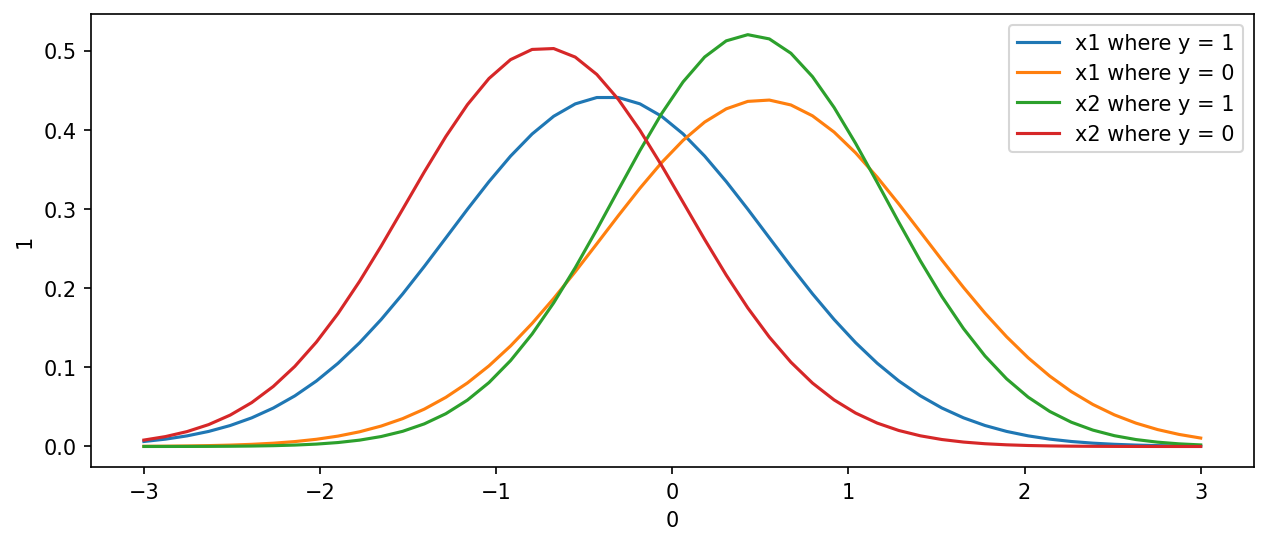

In [16]:
# Plot with seaborn
plt.figure(figsize=(10,4),dpi=150)
for key in dist_locs.keys():
    locs = dist_locs[key]
    d = pd.DataFrame([[i,st.norm(locs['mean'], locs['sd']).pdf(i)] 
                      for i in np.linspace(-3,3)])
    ax = sns.lineplot(d[0],d[1],label=f"{key[0]} where y = {key[1]}")

### Predict

Let's walk through predicting a single observation.

In [17]:
y,x1,x2 = train.iloc[1,:]
print(y,x1,x2)

1.0 0.9973454465835858 0.5675947260277651


In [18]:
# Prediction for the 1 class
a = st.norm(dist_locs[("x1",1)]['mean'], dist_locs[("x1",1)]['sd']).pdf(x1)
b = st.norm(dist_locs[("x2",1)]['mean'], dist_locs[("x2",1)]['sd']).pdf(x2)
c = pr_y1
pr_1 = a * b * c

# Prediction for the 0 class
a = st.norm(dist_locs[("x1",0)]['mean'], dist_locs[("x1",0)]['sd']).pdf(x1)
b = st.norm(dist_locs[("x2",0)]['mean'], dist_locs[("x2",0)]['sd']).pdf(x2)
c = pr_y0
pr_0 = a * b * c

print(
f'''
    Pr(y == 1| X): {pr_1}
    Pr(y == 0| X): {pr_0}
''')


    Pr(y == 1| X): 0.04553473825311161
    Pr(y == 0| X): 0.018857981798910916



4.55% is greater than 1.89%, so we predict that $y = 1$

### Predicting multiple observations

In [19]:
def predict(data,dist_locs):
    ''''''
    store_preds = []
    for i,row in data.iterrows():
        
        # Get the predictions using a Gaussan distribution
        pr_0 = 1; pr_1 = 1
        for j in range(1,len(row)):
            pr_0 *= st.norm(dist_locs[(row.index[j],0)]['mean'],
                            dist_locs[(row.index[j],0)]['sd']).pdf(row.values[j])
            pr_1 *= st.norm(dist_locs[(row.index[j],1)]['mean'], 
                            dist_locs[(row.index[j],1)]['sd']).pdf(row.values[j])
        pr_0 *= pr_y0
        pr_1 *= pr_y1
        
        # Assign the class designation to the highest probability
        if pr_0 >= pr_1:
            class_pred = 0
        else:
            class_pred = 1
            
        store_preds.append([pr_0,pr_1,class_pred])
        
    return pd.DataFrame(store_preds,columns=["pr_0","pr_1","pred"])

# Run
preds_train = predict(train,dist_locs)

In [20]:
# Predicted output
preds_train.head(10)

,pr_0,pr_1,pred
0,0.017456,0.031683,1
1,0.018858,0.045535,1
2,0.015126,0.104417,1
3,0.006567,0.011217,1
4,0.012673,0.140413,1
5,0.013239,0.000129,0
6,0.000359,0.007559,1
7,0.041775,0.017549,0
8,0.057935,0.007510,0
9,0.020291,0.010154,0


Examine the predictive accuracy of the training data. 

In [21]:
accuracy_train = sum(train.y == preds_train.pred)/train.shape[0]
accuracy_train

0.862

Examine the predictive accuracy on the test data.

In [22]:
preds_test = predict(test,dist_locs)

In [23]:
accuracy_test = sum(test.y == preds_test.pred)/test.shape[0]
accuracy_test

0.862

## `sklearn` implementation

In [24]:
# Organize our data real quick so it plugs into the sklearn API easily 
train_y = train['y']
train_x = train[['x1','x2']]
test_y = test['y']
test_x = test[['x1','x2']]

In [25]:
from sklearn.naive_bayes import GaussianNB # Classifier 
import sklearn.metrics as m # Metrics to determine the classification 

# Instantiate the model class
gnb = GaussianNB()
gnb.fit(train_x, train_y) # Train

# Predict 
y_pred = gnb.predict(test_x)

# Out-of-sample performance 
m.accuracy_score(test_y,y_pred)

0.862

Consider alternative performance metrics.

In [26]:
m.roc_auc_score(test_y,y_pred)

0.8441666666666666

Generate a ROC curve plot. First, we need the model to return probabilities not predictions. 

In [27]:
probs = gnb.predict_proba(test_x)
probs =  pd.DataFrame(probs,columns=gnb.classes_)
probs

,0.0,1.0
0,0.946550,0.053450
1,0.970974,0.029026
2,0.136194,0.863806
3,0.068829,0.931171
4,0.010823,0.989177
...,...,...
495,0.378571,0.621429
496,0.295044,0.704956
497,0.726738,0.273262
498,0.434290,0.565710


In [28]:
# Generate the False Positive Rate and True Positive Rate Given different thresholds
fpr, tpr, thresholds = m.roc_curve(test_y, probs[1])

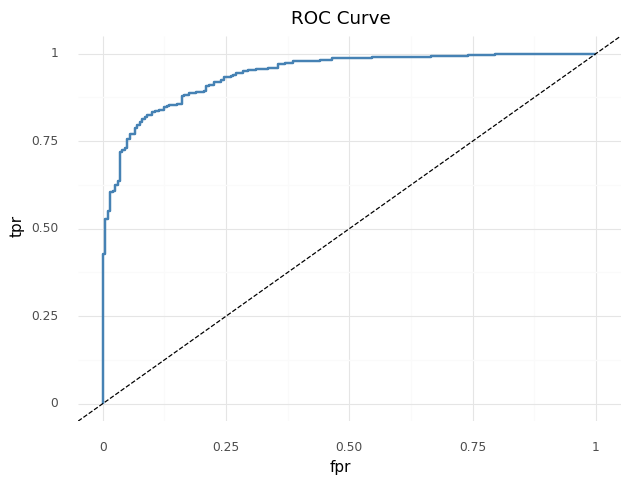

<ggplot: (-9223363242422447791)>

In [29]:
# Plot the ROC Curve
( 
    ggplot(pd.DataFrame(dict(fpr=fpr,tpr=tpr)),
           aes(x="fpr",y="tpr")) +
    geom_path(color="steelblue",size=1) +
    geom_abline(intercept=0,slope=1,linetype="dashed") +
    theme_minimal() +
    labs(title="ROC Curve") +
    theme(figure_size=(7,5))
)